<a href="https://colab.research.google.com/github/Mmbsaksd/Customer-segmentation/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

> Indented block



### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

#**Feature Engineering**

##**Importing**

In [1]:
#Importing the essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the datasets
df = pd.read_csv('/content/Online Retail.xlsx - Online Retail.csv')


##**Data Inspection**

In [3]:
#First Look
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/10 8:26,3.39,17850.0,United Kingdom


In [4]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [5]:
#Checking shape
df.shape

(523536, 8)

In [6]:
#Checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523536 entries, 0 to 523535
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    523536 non-null  object 
 1   StockCode    523535 non-null  object 
 2   Description  522091 non-null  object 
 3   Quantity     523535 non-null  float64
 4   InvoiceDate  523535 non-null  object 
 5   UnitPrice    523535 non-null  float64
 6   CustomerID   394765 non-null  float64
 7   Country      523535 non-null  object 
dtypes: float64(3), object(5)
memory usage: 32.0+ MB


##**Handling Missing Data**

In [7]:
from pandas.core import missing
#Missing value count Function
def show_missing():
  missing = df.columns[df.isnull().any()].tolist()
  return missing

#Missing data count and percentage
print("Missing Data Count")
print(df[show_missing()].isnull().sum().sort_values(ascending=False))
print('--'*50)
print('Missing Data Percentage')
print(round(df[show_missing()].isnull().sum().sort_values(ascending=False)/len(df)*100,2))

Missing Data Count
CustomerID     128771
Description      1445
StockCode           1
Quantity            1
InvoiceDate         1
UnitPrice           1
Country             1
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
CustomerID     24.60
Description     0.28
StockCode       0.00
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
Country         0.00
dtype: float64


In [8]:
#Handling the missing values
#Customer id is irrelavant so dropping
#df.drop.('CustomerID', axis=1, inplace=True)

#Description cant be imputed by mesuare of tendancy
#So dropping null value row
df.dropna(inplace=True)

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/10 8:26,3.39,17850.0,United Kingdom


In [9]:
#Reconfirmation on null value
df.isnull().sum().sort_values(ascending=False)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

##**Removing Cancelled Rows**

In [10]:
#Converting invoice number columns into str
df['InvoiceNo'] = df['InvoiceNo'].astype(str)

#Remove row which are cancelled
df = df[~df['InvoiceNo'].str.contains('C')]

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/10 8:26,3.39,17850.0,United Kingdom


##**Date Columns Split**

In [11]:
#Extracting element from invoice date
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['WeekDay'] = df['InvoiceDate'].dt.day_name()
df['Month'] = df['InvoiceDate'].dt.month_name()
df['Day'] = df['InvoiceDate'].apply(lambda x: x.day)
df['Year'] = df['InvoiceDate'].apply(lambda x: x.year)
df['Hour'] = df['InvoiceDate'].apply(lambda x: x.hour)
df['Minute'] = df['InvoiceDate'].apply(lambda x: x.minute)


In [12]:
#Create total amount columns
df['Total_Amount'] = df['Quantity']*df['UnitPrice']

#DataFrame Look
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,WeekDay,Month,Day,Year,Hour,Minute,Total_Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,December,1,2010,8,26,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,1,2010,8,26,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,December,1,2010,8,26,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,1,2010,8,26,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,1,2010,8,26,20.34


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386088 entries, 0 to 523534
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     386088 non-null  object        
 1   StockCode     386088 non-null  object        
 2   Description   386088 non-null  object        
 3   Quantity      386088 non-null  float64       
 4   InvoiceDate   386088 non-null  datetime64[ns]
 5   UnitPrice     386088 non-null  float64       
 6   CustomerID    386088 non-null  float64       
 7   Country       386088 non-null  object        
 8   WeekDay       386088 non-null  object        
 9   Month         386088 non-null  object        
 10  Day           386088 non-null  int64         
 11  Year          386088 non-null  int64         
 12  Hour          386088 non-null  int64         
 13  Minute        386088 non-null  int64         
 14  Total_Amount  386088 non-null  float64       
dtypes: datetime64[ns]

#**Explorative Data Analysis(EDA)**

In [14]:
#Checking the statistical discribtion
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,WeekDay,Month,Day,Year,Hour,Minute,Total_Amount
count,386088,386088,386088,386088.000000,386088,386088.000000,386088.000000,386088,386088,386088,386088.000000,386088.000000,386088.000000,386088.000000,386088.000000
unique,18032,3657,3868,NaN,16831,NaN,NaN,37,6,12,NaN,NaN,NaN,NaN,NaN
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-11-14 15:27:00,NaN,NaN,United Kingdom,Thursday,November,NaN,NaN,NaN,NaN,NaN
freq,542,1995,1995,NaN,542,NaN,NaN,343675,77520,64545,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-04 13:59:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,12.826858,NaN,3.129040,15293.284096,NaN,NaN,NaN,15.307663,2010.932243,12.717362,30.427991,22.006040
std,NaN,NaN,NaN,128.494777,NaN,22.273428,1713.010206,NaN,NaN,NaN,8.646234,0.251328,2.265757,17.080019,157.228647
min,NaN,NaN,NaN,1.000000,NaN,0.000000,12346.000000,NaN,NaN,NaN,1.000000,2010.000000,6.000000,0.000000,0.000000
25%,NaN,NaN,NaN,2.000000,NaN,1.250000,13969.000000,NaN,NaN,NaN,8.000000,2011.000000,11.000000,16.000000,4.950000


In [15]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'WeekDay', 'Month', 'Day', 'Year',
       'Hour', 'Minute', 'Total_Amount'],
      dtype='object')

In [16]:
#Creating DataFrame on description and count
Description_df = df['Description'].value_counts().reset_index()
Description_df.rename(columns={'index':'Description_Name'},inplace=True)
Description_df.rename(columns={'Description':'Count'}, inplace=True)
Description_df.head()

,Description_Name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,1995
1,REGENCY CAKESTAND 3 TIER,1691
2,JUMBO BAG RED RETROSPOT,1590
3,PARTY BUNTING,1387
4,ASSORTED COLOUR BIRD ORNAMENT,1384


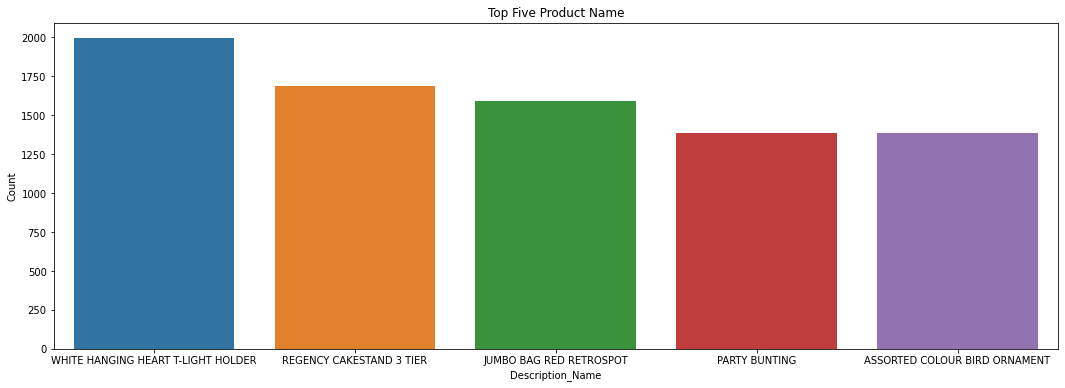

In [17]:
#Plotting on barplot
plt.figure(figsize=(18,6))
plt.title('Top Five Product Name')
sns.barplot(x='Description_Name',y='Count', data=Description_df[:5])

**Top Five product based on selling**


1.   Whit Hanging Heart Light Holder
2.   Regency Cake Stand 3 Tier
3.   Jumbo Bang Red Retrospect
4.   Assorted Colour Bird Arangment
5.   Party Bunting

In [18]:
#Printing last five rows
Description_df.tail()

,Description_Name,Count
3863,"LETTER ""Y"" BLING KEY RING",1
3864,"PEARL & SHELL 42""NECKL. IVORY",1
3865,ZINC PLANT POT HOLDER,1
3866,FIRE POLISHED GLASS BRACELET RED,1
3867,SILVER AND BLACK ORBIT NECKLACE,1


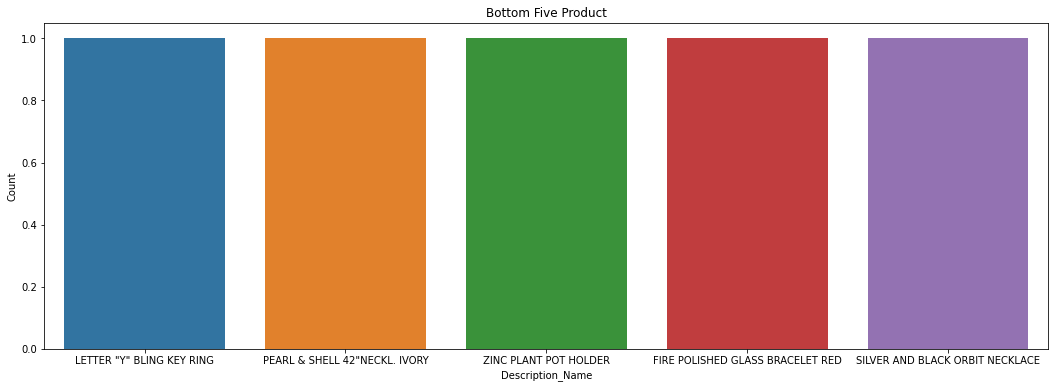

In [19]:
#Plotting bottom five Product Based On Selling
plt.figure(figsize=(18,6))
plt.title('Bottom Five Product')
sns.barplot(x='Description_Name',y='Count',data=Description_df[-5:])

**Bottom Five Product**

1.   Ruby GlassCluster Earning
2.   Pink Chrysanthemums Art Flower
3.   Cake Case Vintage Christmas
4    Wall Art The Magic Forest
5.   Paper Craft Little Birdie



In [20]:
#Creating the table of stock distribution
Stockcode_df = df['StockCode'].value_counts().reset_index()
Stockcode_df.rename(columns={'index':'StockCode_Name'},inplace=True)
Stockcode_df.rename(columns={'StockCode':'Count'},inplace=True)
Stockcode_df.head()

,StockCode_Name,Count
0,85123A,1995
1,22423,1691
2,85099B,1590
3,47566,1387
4,84879,1384


In [21]:
#Printing Bottom Five rows
Stockcode_df.tail()

,StockCode_Name,Count
3652,90055,1
3653,79323B,1
3654,44265,1
3655,90039B,1
3656,20964,1


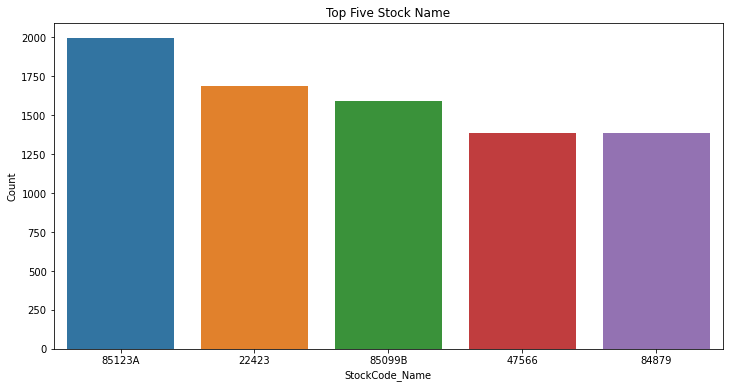

In [22]:
#Plotting Top Five Stock
plt.figure(figsize=(12,6))
plt.title('Top Five Stock Name')
sns.barplot(x='StockCode_Name',y='Count',data=Stockcode_df[:5])

**Top Five Stock Name**


1.   85123A
2.   22423
3.   85099B
4.   83879
5.   47566


In [23]:
#List of bottom 5 stockcode name
Stockcode_df.tail()

,StockCode_Name,Count
3652,90055,1
3653,79323B,1
3654,44265,1
3655,90039B,1
3656,20964,1


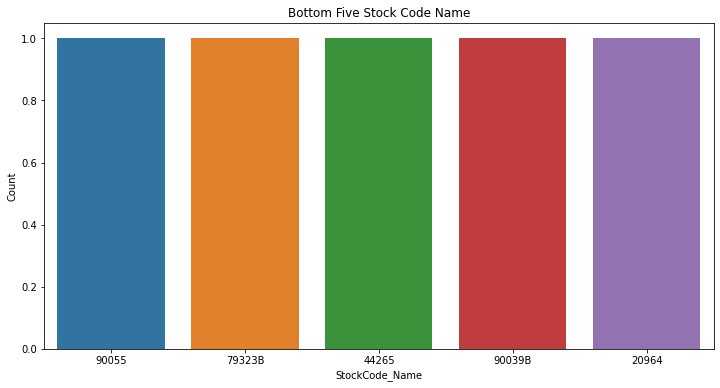

In [24]:
#Plotting bottom five stockcode name
plt.figure(figsize=(12,6))
plt.title('Bottom Five Stock Code Name')
sns.barplot(x='StockCode_Name',y='Count',data=Stockcode_df[-5:])

In [25]:
#Creating the table of countribution with its distribution
country_df = df['Country'].value_counts().reset_index()
country_df.rename(columns={'index':'Country_Name'},inplace=True)
country_df.rename(columns={'Country':'Count'},inplace=True)
country_df.head()

,Country_Name,Count
0,United Kingdom,343675
1,Germany,8810
2,France,8137
3,EIRE,6953
4,Spain,2420


In [26]:
#Print tail of countries distribution
country_df.tail()

,Country_Name,Count
32,Lithuania,35
33,Brazil,32
34,Czech Republic,25
35,Bahrain,17
36,Saudi Arabia,9


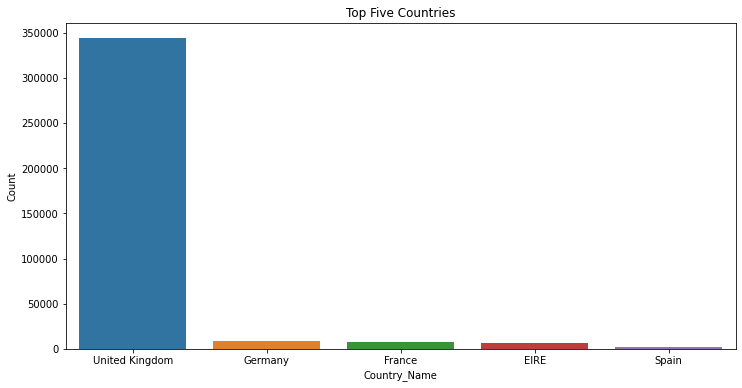

In [27]:
#Ploting top five countries
plt.figure(figsize=(12,6))
plt.title('Top Five Countries')
sns.barplot(x='Country_Name', y='Count',data=country_df[:5] )

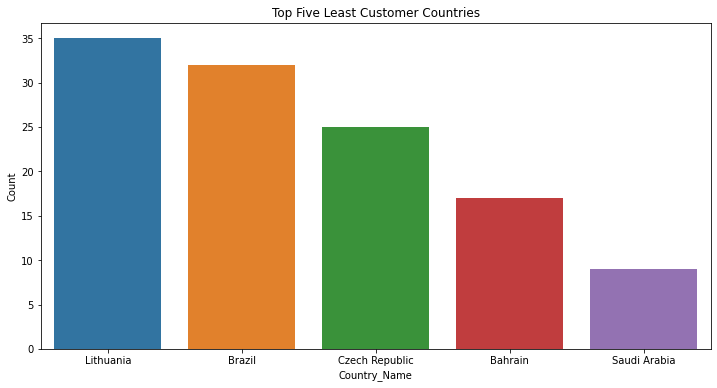

In [28]:
#Plotting top least customer countries
plt.figure(figsize=(12,6))
plt.title('Top Five Least Customer Countries')
sns.barplot(x='Country_Name',y='Count',data=country_df[-5:])

**Observation On Countries Distribution**

*   Most customer are belong to UK, then Germany, France, EIFE and Spain respectively
*   Least customer company are Greece, United Arab Emirate, Austria, Israel and Soudia Arabia


In [29]:
#Checking customer of soudia arabia
df[df['Country']=='Saudi Arabia']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,WeekDay,Month,Day,Year,Hour,Minute,Total_Amount
100810,544838,22915,ASSORTED BOTTLE TOP MAGNETS,12.0,2011-02-24 10:34:00,0.42,12565.0,Saudi Arabia,Thursday,February,24,2011,10,34,5.04
100811,544838,22363,GLASS JAR MARMALADE,6.0,2011-02-24 10:34:00,2.95,12565.0,Saudi Arabia,Thursday,February,24,2011,10,34,17.70
100812,544838,22362,GLASS JAR PEACOCK BATH SALTS,6.0,2011-02-24 10:34:00,2.95,12565.0,Saudi Arabia,Thursday,February,24,2011,10,34,17.70
100813,544838,22361,GLASS JAR DAISY FRESH COTTON WOOL,6.0,2011-02-24 10:34:00,2.95,12565.0,Saudi Arabia,Thursday,February,24,2011,10,34,17.70
100814,544838,22553,PLASTERS IN TIN SKULLS,12.0,2011-02-24 10:34:00,1.65,12565.0,Saudi Arabia,Thursday,February,24,2011,10,34,19.80
100815,544838,22555,PLASTERS IN TIN STRONGMAN,12.0,2011-02-24 10:34:00,1.65,12565.0,Saudi Arabia,Thursday,February,24,2011,10,34,19.80
100816,544838,22556,PLASTERS IN TIN CIRCUS PARADE,12.0,2011-02-24 10:34:00,1.65,12565.0,Saudi Arabia,Thursday,February,24,2011,10,34,19.80
100817,544838,20781,GOLD EAR MUFF HEADPHONES,2.0,2011-02-24 10:34:00,5.49,12565.0,Saudi Arabia,Thursday,February,24,2011,10,34,10.98
100818,544838,22969,HOMEMADE JAM SCENTED CANDLES,12.0,2011-02-24 10:34:00,1.45,12565.0,Saudi Arabia,Thursday,February,24,2011,10,34,17.40


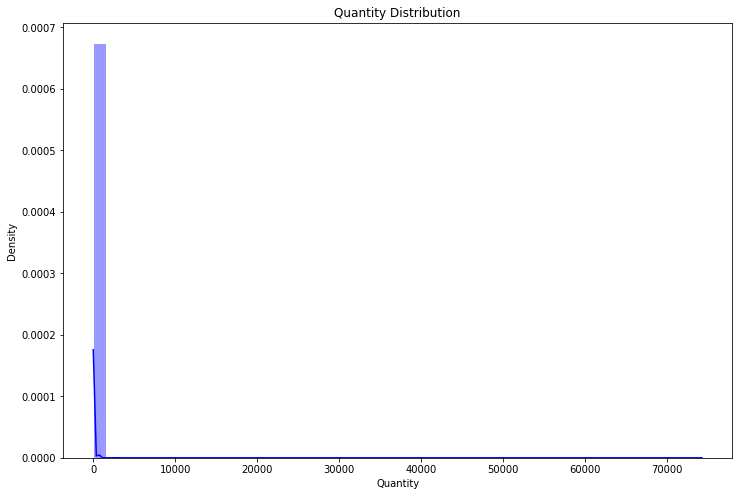

In [30]:
#Plotting Distribution of Quantity
plt.figure(figsize=(12,8))
plt.title("Quantity Distribution")
sns.distplot(df['Quantity'],color="B")

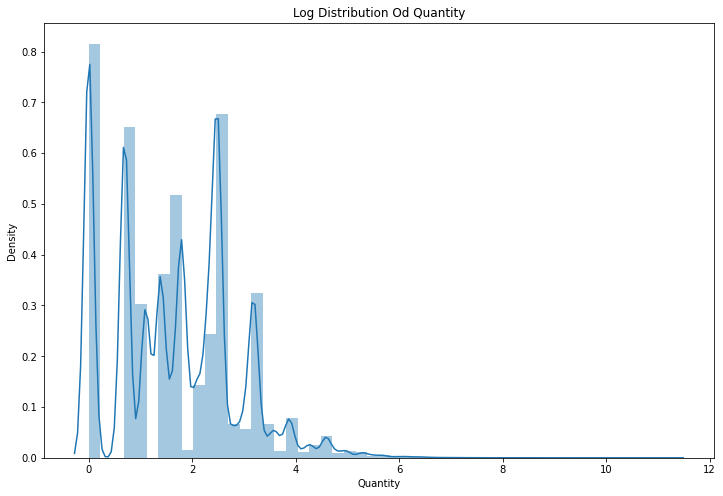

In [31]:
#Distribution Of Quantity with log
plt.figure(figsize=(12,8))
plt.title('Log Distribution Od Quantity')
sns.distplot(np.log(df['Quantity']))

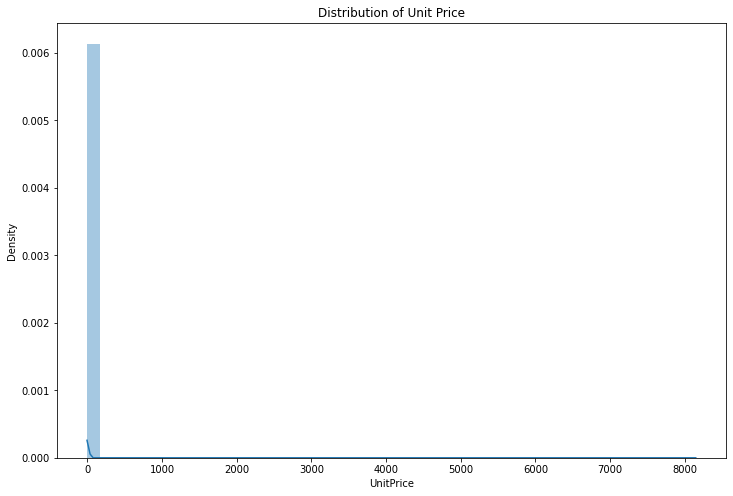

In [32]:
#Checking the disatribution of unitprice
plt.figure(figsize=(12,8))
plt.title('Distribution of Unit Price')
sns.distplot(df['UnitPrice'])

In [33]:
#Checking the dispersion of price unit
df['UnitPrice'].describe([0.75,0.90,0.95,0.99])

count    386088.000000
mean          3.129040
std          22.273428
min           0.000000
50%           1.950000
75%           3.750000
90%           6.350000
95%           8.500000
99%          14.950000
max        8142.750000
Name: UnitPrice, dtype: float64

In [34]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'WeekDay', 'Month', 'Day', 'Year',
       'Hour', 'Minute', 'Total_Amount'],
      dtype='object')

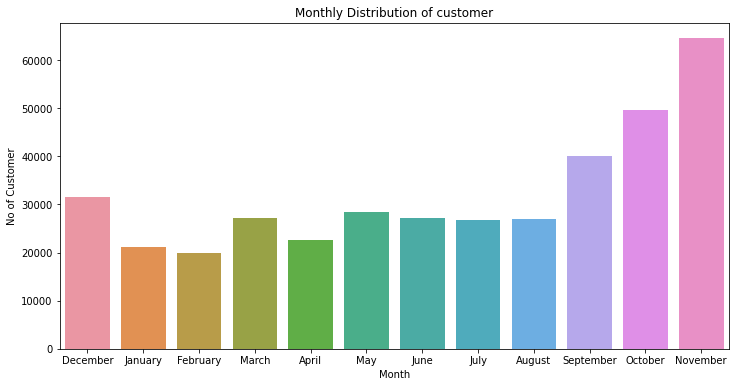

In [35]:
#Plotting the distribution on monthly basis
plt.figure(figsize=(12,6))
sns.countplot(x='Month', data=df)
plt.title("Monthly Distribution of customer")
plt.xlabel('Month')
plt.ylabel("No of Customer")
plt.show()

Text(0.5, 0, 'Week Name')

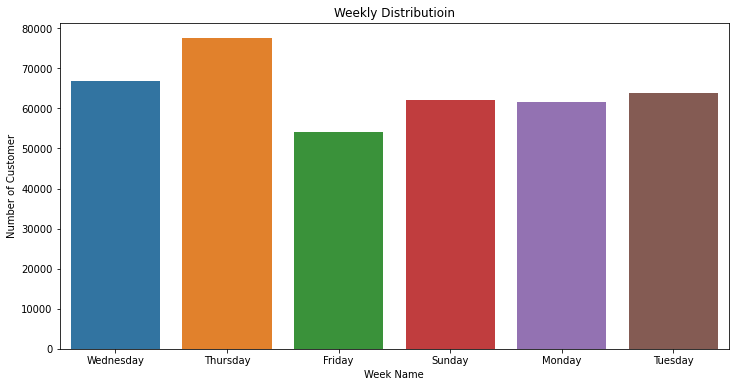

In [36]:
#Plotting the distribution of weeks
plt.figure(figsize=(12,6))
plt.title('Weekly Distributioin')
sns.countplot(x='WeekDay', data=df)
plt.ylabel('Number of Customer')
plt.xlabel('Week Name')

Text(0, 0.5, 'No of Hours')

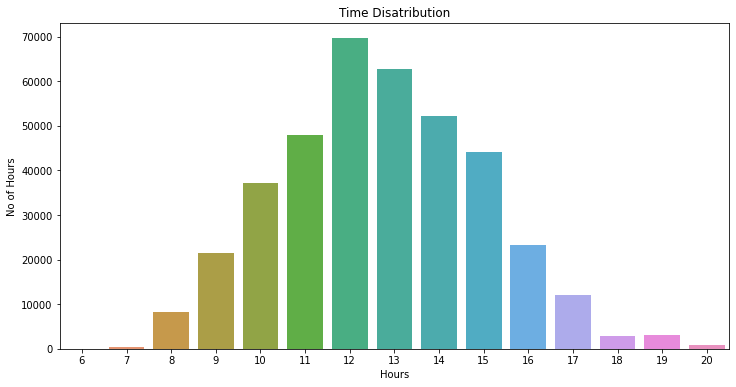

In [37]:
#Plotting time distribution
plt.figure(figsize=(12,6))
sns.countplot(x='Hour', data=df)
plt.title('Time Disatribution')
plt.xlabel('Hours')
plt.ylabel("No of Hours")

#**Model Building**

##**KMeans Implimentation**

In [38]:
#Importing kmean and required evaluation metrics
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler

In [39]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,WeekDay,Month,Day,Year,Hour,Minute,Total_Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,December,1,2010,8,26,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,1,2010,8,26,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,December,1,2010,8,26,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,1,2010,8,26,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,1,2010,8,26,20.34


In [50]:
import datetime as dt

#Create last date
last_date = dt.datetime(2011,12,31)

#Feature mining
x_features = df.groupby("CustomerID").agg({'InvoiceDate':lambda x:(last_date-x.max()).days,'InvoiceNo':lambda x:len(x),'Total_Amount': lambda x:x.sum()})

#Rename the columns
x_features.rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency', 'Total_Amount':'Monetary' }, inplace=True)

x_features.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,346,1,77183.60
12347.0,60,171,4085.18
12348.0,96,31,1797.24
12349.0,39,73,1757.55
12350.0,331,17,334.40


In [41]:
import math
rfm_df = x_features
rfm_df = rfm_df[rfm_df['Monetary']>0]

In [42]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4310 entries, 12346.0 to 18287.0
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    4310 non-null   int64  
 1   Frequency  4310 non-null   int64  
 2   Monetary   4310 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 134.7 KB


In [43]:
rfm_df['Recency_log'] = rfm_df['Recency'].apply(math.log)
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(math.log)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(math.log)

In [44]:
#Preprocessing for k in kmeans
#x_features = df[['Total_Amount','InvoiceNo']]
scal_featues = StandardScaler()
x = scal_featues.fit_transform(rfm_df)
ran_n_cl = [2,3,4,5,6,7,8,9,10,11,12, 13, 14, 15,16,17,18]
for n_clusters in ran_n_cl:
  kmeans_clust = KMeans(n_clusters = n_clusters)
  pred = kmeans_clust.fit_predict(x)
  centers = kmeans_clust.cluster_centers_

  score = calinski_harabasz_score(x,pred)
  print("For n_clusters ={}, calinski harabasz score is {}".format(n_clusters,score))

For n_clusters =2, calinski harabasz score is 2121.0879595971655
For n_clusters =3, calinski harabasz score is 2057.475707157962
For n_clusters =4, calinski harabasz score is 2282.1557201167157
For n_clusters =5, calinski harabasz score is 2141.3069495784375
For n_clusters =6, calinski harabasz score is 2151.4640777747236
For n_clusters =7, calinski harabasz score is 2147.772481542152
For n_clusters =8, calinski harabasz score is 2152.223398171551
For n_clusters =9, calinski harabasz score is 2124.0324159642064
For n_clusters =10, calinski harabasz score is 2095.2392956016306
For n_clusters =11, calinski harabasz score is 2041.6381790296807
For n_clusters =12, calinski harabasz score is 2004.6393669572046
For n_clusters =13, calinski harabasz score is 1963.965704287159
For n_clusters =14, calinski harabasz score is 1932.777592257225
For n_clusters =15, calinski harabasz score is 1906.438340413871
For n_clusters =16, calinski harabasz score is 1884.0955658913515
For n_clusters =17, cali

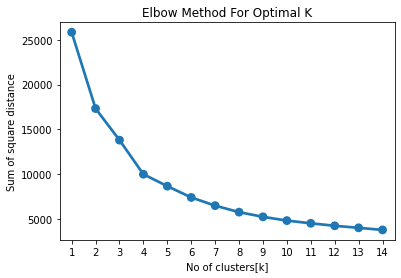

In [45]:
#Plotting Elbow chart
sum_sq_dt = {}
for k in range(1,15):
  km = KMeans(n_clusters= k, init='k-means++', max_iter=1000)
  km = km.fit(x)
  sum_sq_dt[k] = km.inertia_

sns.pointplot(x=list(sum_sq_dt.keys()),y=list(sum_sq_dt.values()))
plt.title("Elbow Method For Optimal K")
plt.xlabel('No of clusters[k]')
plt.ylabel("Sum of square distance")
plt.show()

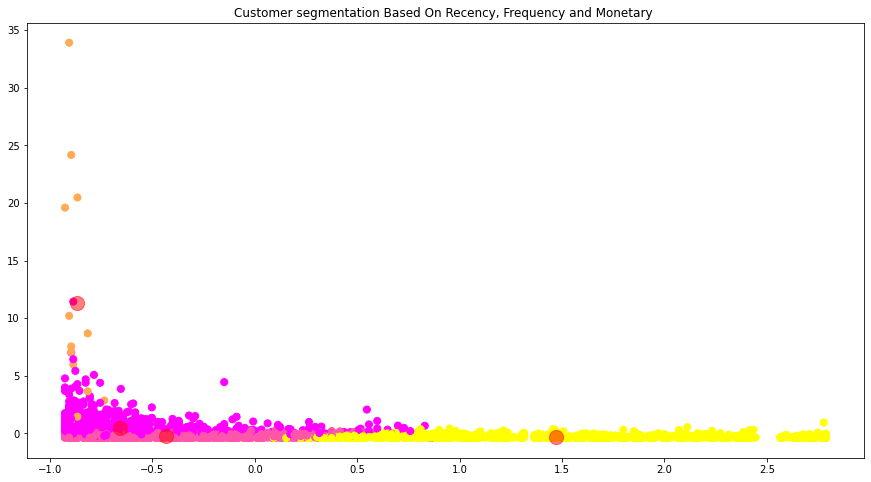

In [46]:
#Implimenting kmeans with optimized k value
kmeans = KMeans(n_clusters=4, init='k-means++',max_iter=1000)
y_kmeans = kmeans.fit_predict(x)

#Plotting revised k value model
plt.figure(figsize=(15,8))
plt.title('Customer segmentation Based On Recency, Frequency and Monetary ')
plt.scatter(x[:,0], x[:,1], c=y_kmeans, s=50, cmap='spring')

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=0.5)

In [49]:
kmeans.labels_

array([3, 0, 1, ..., 1, 0, 0], dtype=int32)

In [47]:
#Initializing cluster columns
kmean = x_features
kmean['Customer_Cluster'] = kmeans.labels_
kmean.head()

ValueError: ignored

In [ ]:
#Plotting the customer segment by k means
sns.countplot(x_features['Customer_Cluster'])

In [ ]:
customer = pd.DataFrame(x_features.Customer_Cluster)
pd.DataFrame(customer.value_counts())

In [ ]:
#Model Evaluation of KMeans
labels = kmeans.labels_
print('Intertia at K =', 5, ':', kmeans.inertia_)
print("Calinski-Harabasz Index: %0.3f" % calinski_harabasz_score(x, labels))
print("Davies-Bouldin Index: %0.3f" % davies_bouldin_score(x, labels))
print("---------------------------------------------------------------")

##**DBSCAN**

In [ ]:
#Implimenting the DBSCAN
from sklearn.cluster import DBSCAN
y_pred = DBSCAN(eps=0.5, min_samples=5).fit_predict(x)
plt.figure(figsize=(15,8))
plt.scatter(x[:,0],x[:,1], c=y_pred)